In [419]:
# import libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [420]:
# read traning data
pd_train = pd.read_csv("exercise_3_training.csv")

# print the dataframe
print(pd_train)

    Unnamed: 0         x         y
0            0  0.000000  0.442580
1            1  0.052632  0.750379
2            2  0.105263  0.982555
3            3  0.157895  0.853643
4            4  0.210526  1.141193
5            5  0.263158  0.831381
6            6  0.315789  1.147227
7            7  0.368421  1.010907
8            8  0.421053  0.664553
9            9  0.473684  0.334169
10          10  0.526316 -0.058656
11          11  0.578947 -0.589828
12          12  0.631579 -0.569363
13          13  0.684211 -0.869054
14          14  0.736842 -1.166119
15          15  0.789474 -1.304733
16          16  0.842105 -0.830502
17          17  0.894737 -0.538124
18          18  0.947368 -0.485276
19          19  1.000000 -0.167024


In [421]:
# create the input and output attributes
inp_attr = pd_train['x'].values.reshape(-1, 1) 

# generate the nonlinear features
poly_order = 20
poly = PolynomialFeatures(poly_order,include_bias=False)
inp_feat = poly.fit_transform(inp_attr)
#print(inp_feat)
out_attr = pd_train['y'].values

In [422]:
inp_feat.shape
#print(inp_feat)

(20, 20)

In [423]:
# L2 penalty - vary alpha and observe the magnitude of the coeff and the errors
# Note that regularization coefficient - alpha=lambda (in the lecture)
# alpha = 0.0
# alpha = 0.1
# alpha = 100

# l2 = Ridge(alpha=0)

# l2 = Ridge(alpha=0.1)

# l2 = Ridge(alpha=100)

# l2 = Lasso(alpha=0)

# l2=Lasso(alpha=0.1)

# l2=Lasso(alpha=100)

l2=LinearRegression()

l2.fit(inp_feat, out_attr)
print('coef = ', l2.coef_)

coef =  [-2.59128392e+04  1.65188641e+06 -4.53165628e+07  7.22206902e+08
 -7.57015130e+09  5.57913276e+10 -3.00743195e+11  1.21357819e+12
 -3.70683750e+12  8.56425994e+12 -1.47117448e+13  1.78399996e+13
 -1.27976871e+13 -2.71996426e+11  1.34448932e+13 -1.79994781e+13
  1.33583652e+13 -6.10968525e+12  1.62021131e+12 -1.92034832e+11]


In [424]:
# read testing data
pd_test = pd.read_csv("exercise_2_testing-1.csv")

# create the input and output attributes
test_inp_attr = pd_test['x'].values.reshape(-1, 1) 

# generate the nonlinear features
test_inp_feat = poly.fit_transform(test_inp_attr)
test_out_attr = pd_test['y'].values

In [425]:
# L2 - model performance
l2_train_pred = l2.predict(inp_feat)
print(l2_train_pred)
print('L2 - MSE train = ', mean_squared_error(l2_train_pred,out_attr))


l2_test_pred = l2.predict(test_inp_feat)
print('L2 - MSE test = ', mean_squared_error(l2_test_pred,test_out_attr))

[ 0.44398568  0.75013208  0.98129246  0.85294718  1.14031573  0.83077058
  1.14655323  1.0102288   0.66437123  0.33364461 -0.05910994 -0.58992698
 -0.56996085 -0.86967398 -1.16697623 -1.30418326 -0.8299401  -0.53697135
 -0.48326041 -0.16245963]
L2 - MSE train =  1.7506431193784012e-06
L2 - MSE test =  2169.731962011994


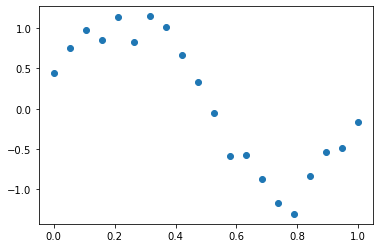

In [426]:
plt.scatter(inp_attr,out_attr)
plt.show()

In [427]:
plt.scatter(out_attr,l2_train_pred)
plt.xlabel("Actual target")
plt.ylabel("Predicted Target")
plt.show()


In [428]:
'''
1.Replace the line l2=Ridge(alpha=0.1) with l2=Lasso(alpha=0.1). Execute the notebook for alpha=0.1, and alpha=100.

2. Add a new cell at the end of the notebook and add your answers to the following questions as comments.

** When alpha = 0,the magnitudes of the coefficients are very large and MSE of test is significantly greater than MSE training.That means it is overfitting **

2.1. What happens with the model parameters/coefficients when alpha=0.1?

Ans : l2=Rigde (alpha = 0.1)
      When alpha = 0.1, this means there will be a penalty added to the coefficients.  
      
      l2=Lasso(alpha=0.1)
      When alpha=0.1,Lasso regularization performs an automatic form of feature selection and it drives many coefficients to zero.
      

2.2. What happens with the model parameters when alpha=100? Explain why is this happening.

Ans : l2=Rigde (alpha = 100)
      When the value of alpha is set to 100, the coefficient values increases. Model becomes very stiff and MSE of training and testing are very close.
      This happens because with increase in aplha the slope of the line decreases
      
      l2=Lasso(alpha=100)
      When value of aplha is set to 100, all the coefficients become 0 and the predicted values are a constant.
      Since aplha is very large here, sum of squared error is completely ignored and its going to minimise the penalty and weights are zero.
      So, every time we predict a value its going to give us a constant value.

2.3. How does MSE compares between alpha=0.1 and alpha=100? Explain which model you prefer.

Ans : l2=Ridge(alpha=0.1)
      MSE test and train are very close and are significantly small compared to when alpha was 100. 
      
      l2=Ridge(alpha=100)
      Model becomes very stiff and MSE of training and testing are very close. 
      MSE for test and train has increased compared to when aplha was 0.1
      MSE value increases with increase in alpha. 
      
      
      l2=Lasso(alpha=0.1)
      MSE of both test and train are close to each other and MSE for test and train when alpha = 0.1 is almost half of MSE when alpha is 100.
      
      l2=Lasso(alpha=100)
      Since aplha is very large here, sum of squared error is completely ignored and its going to minimise the penalty and weights are zero.
      With increase in value of alpha, MSE increased.
      
      Among the two Lasso models when aplha=0.1 is preferred because when value of alpha is very high i.e 100, it will return a constant value for all the predictions.
      
      
      Ridge regression model is preferred with regularization coefficient i.e alpha = 0.1
      This is because we can generalize from scatter plot that our test data is represented in the form of Sin function and when ridge regression is applied with a polynomial order 20 and alpha 0.1, 
      we observe that there is a penalty added to the coefficients and MSE for test and training data are very close. 
      
      
3. Now replace the same line with l2=LinearRegression(). Execute the entire notebook.


4. Add another new cell at the end of the notebook and add your answers to the following questions as comments. 


4.1. What can you say about the magnitude of the model parameters? 

Ans : The magnitude of coefficients are very high. From MSE of test and train, we can conclude that it is Overfiting.


4.2. What conclusion can you draw from the training and the testing MSE?

Ans : MSE training being very small compared to MSE test(which has a very high value). We can say that it is Overfitting.
      That is, the regularization model fits exactly against the traiing data but doesn't peform well on testing data.


4.3. Is the linear regression model better than the previous two lasso models? From all the three models which one would you prefer and why?

Ans : No, Linear Regression model is not better that previous two Lasso models because we can clearly conclude by observing MSE values of train and test, that it is Overfitting.
      
      Among two Lasso models and linear regression model. lasso model with coefficient value 0.1 is preferred because it returns MSE value for test and train which are very close.
      And when alpha is 100 for Lasso model, it returns a constant value for all predictions.
      
      Among Linear Regression, Lasso and Ridge. Ridge regression model is preferred with regularization coefficient i.e alpha = 0.1
      This is because we can generalize from scatter plot that our test data is represented in the form of Sin function and when ridge regression is applied with a polynomial order 20 and alpha 0.1, 
      we observe that there is a small penalty added to the coefficients and MSE for test and training data are very close. 
      
      

'''

"\n1.Replace the line l2=Ridge(alpha=0.1) with l2=Lasso(alpha=0.1). Execute the notebook for alpha=0.1, and alpha=100.\n\n2. Add a new cell at the end of the notebook and add your answers to the following questions as comments.\n\n** When alpha = 0,the magnitudes of the coefficients are very large and MSE of test is significantly greater than MSE training.That means it is overfitting **\n\n2.1. What happens with the model parameters/coefficients when alpha=0.1?\n\nAns : l2=Rigde (alpha = 0.1)\n      When alpha = 0.1, this means there will be a penalty added to the coefficients.  \n      \n      l2=Lasso(alpha=0.1)\n      When alpha=0.1,Lasso regularization performs an automatic form of feature selection and it drives many coefficients to zero.\n      \n\n2.2. What happens with the model parameters when alpha=100? Explain why is this happening.\n\nAns : l2=Rigde (alpha = 100)\n      When the value of alpha is set to 100, the coefficient values increases. Model becomes very stiff and MSE